# Dataset Analysis 
This workbook is used to visualise the distribution of features in the datasets used for the project.

## Imports

In [34]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Used for visualising categorical data 

## Wine Quality Datasets
This section covers the distribution and features within the wine quality datasets. It examines both the white and red wine sets.

In [36]:
df_red = pd.read_csv("Data/Raw/Wine_Datasets/UCI_Wines/winequality-red.csv", sep=';')
df_white = pd.read_csv("Data/Raw/Wine_Datasets/UCI_Wines/winequality-white.csv", sep=';')

Feature description. It is useful to view the columns contained within the dataset and the datatypes.

In [37]:
# Print data info 
print("Red Wine Dataset Info:")
print(df_red.info())

Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [38]:
print("\nWhite Wine Dataset Info:")
print(df_white.info())


White Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1

### Describe and Visualise Datasets
We can visualise the count and distribution of datasets here. It is useful for removing outliers when processing the datasets later. 


Red Wine Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.01200

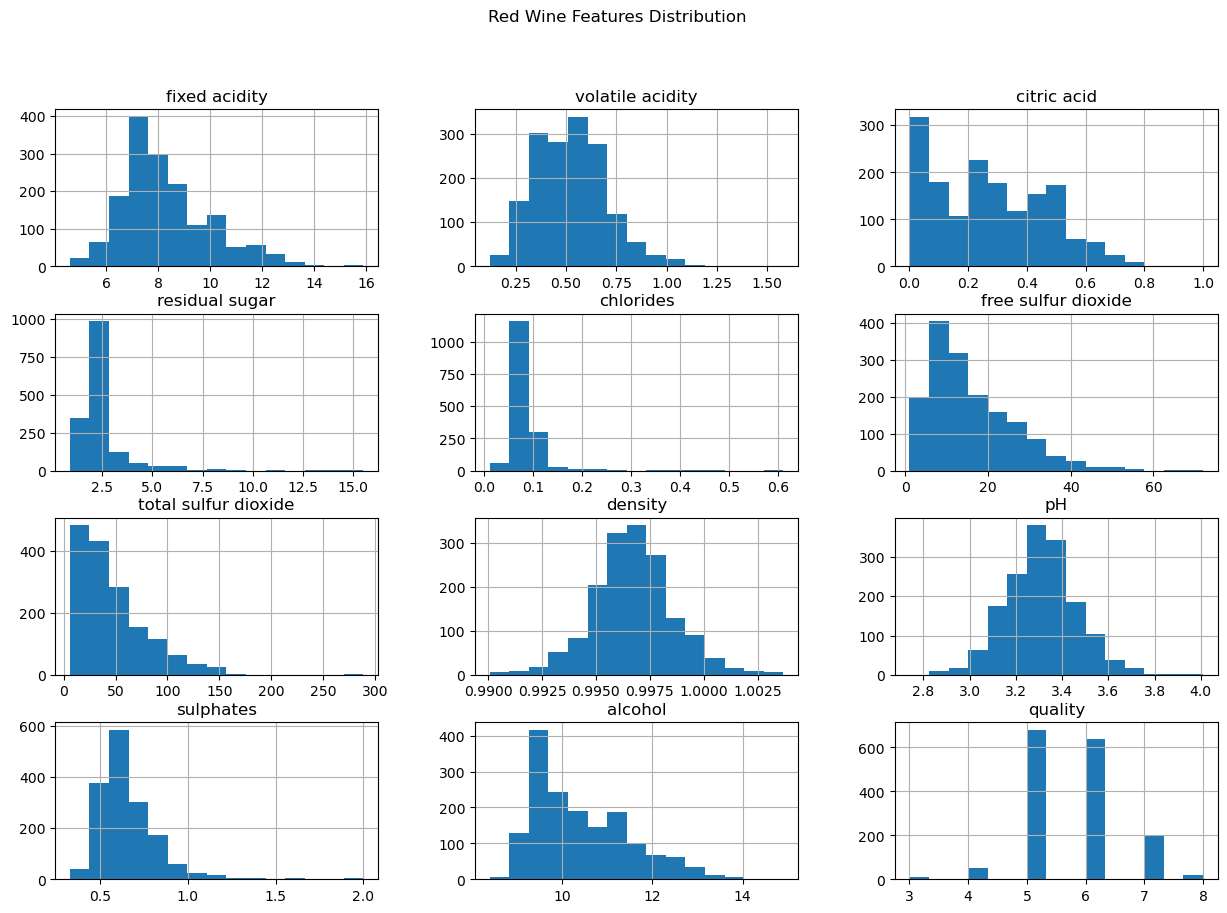

In [39]:
# Visualise Datasets 
# Histograms for each feature in red wine dataset
print("\nRed Wine Dataset Description:")
print(df_red.describe())
df_red.hist(bins=15, figsize=(15, 10))
plt.suptitle("Red Wine Features Distribution")
plt.show()


White Wine Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009

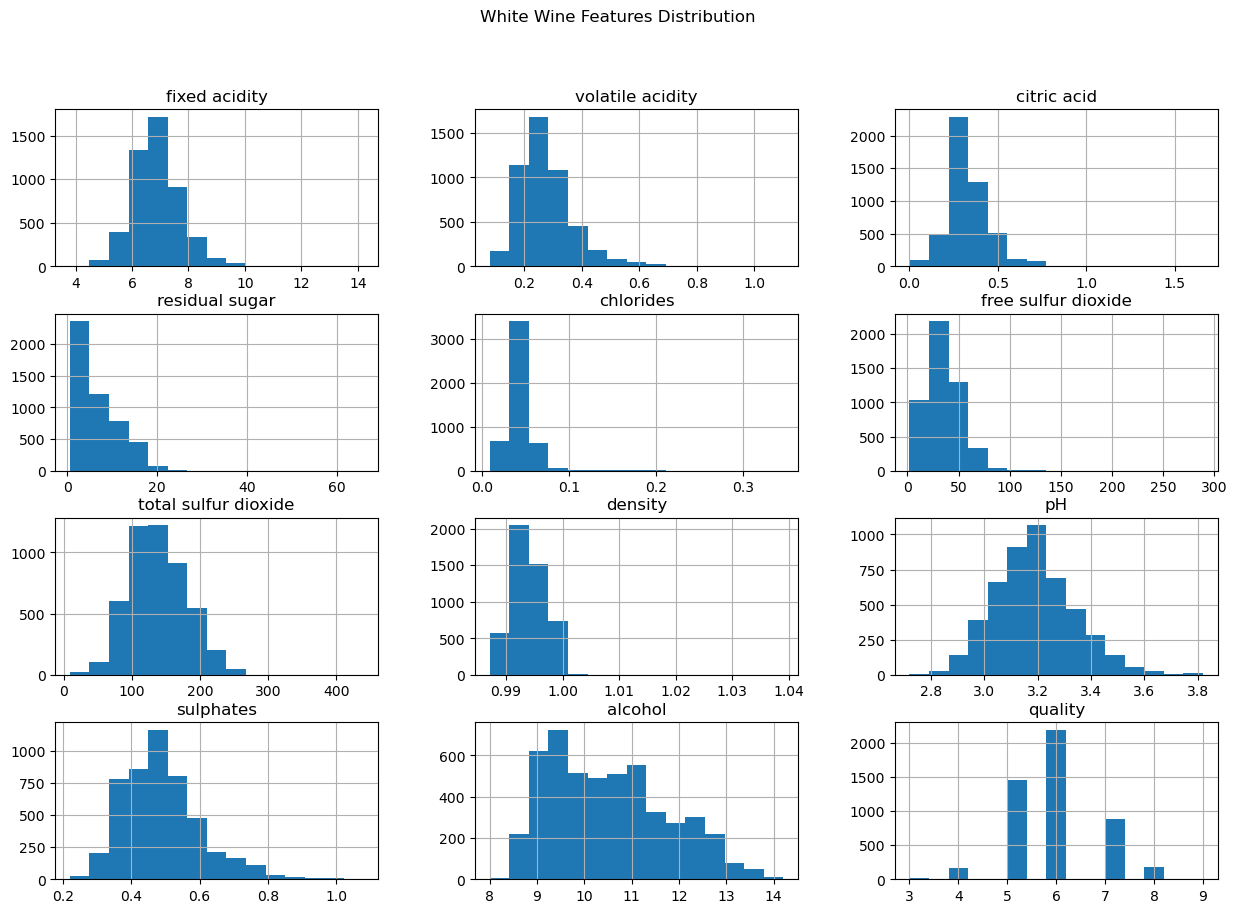

In [40]:
# Histograms for each feature in white wine dataset
print("\nWhite Wine Dataset Description:")
print(df_white.describe())
df_white.hist(bins=15, figsize=(15, 10))
plt.suptitle("White Wine Features Distribution")
plt.show()

## Wine Cost Datasets
This section covers the wine cost dataset. 

In [41]:
# Load datasets
df_red_cost = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/Red.csv")
df_white_cost = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/White.csv")
df_rose_cost = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/Rose.csv")
df_sparkling_cost = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/Sparkling.csv")

In [42]:
# Print data info 
print("Red Wine Dataset Info:")
print(df_red_cost.info())

Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB
None


In [43]:
# Print white wine dataset info
print("\nWhite Wine Dataset Info:")
print(df_white_cost.info())


White Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3764 non-null   object 
 1   Country          3764 non-null   object 
 2   Region           3764 non-null   object 
 3   Winery           3764 non-null   object 
 4   Rating           3764 non-null   float64
 5   NumberOfRatings  3764 non-null   int64  
 6   Price            3764 non-null   float64
 7   Year             3764 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 235.4+ KB
None


In [44]:
# Print rose wine dataset info
print("\nRose Wine Dataset Info:")
print(df_rose_cost.info())


Rose Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             397 non-null    object 
 1   Country          397 non-null    object 
 2   Region           397 non-null    object 
 3   Winery           397 non-null    object 
 4   Rating           397 non-null    float64
 5   NumberOfRatings  397 non-null    int64  
 6   Price            397 non-null    float64
 7   Year             397 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.9+ KB
None


In [45]:
# Print sparkling wine dataset info
print("\nSparkling Wine Dataset Info:")
print(df_sparkling_cost.info())


Sparkling Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1007 non-null   object 
 1   Country          1007 non-null   object 
 2   Region           1007 non-null   object 
 3   Winery           1007 non-null   object 
 4   Rating           1007 non-null   float64
 5   NumberOfRatings  1007 non-null   int64  
 6   Price            1007 non-null   float64
 7   Year             1007 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 63.1+ KB
None


### Red Categorical Data Visualization
Now let's create visualizations specifically for the object-type (categorical) variables in our wine datasets.

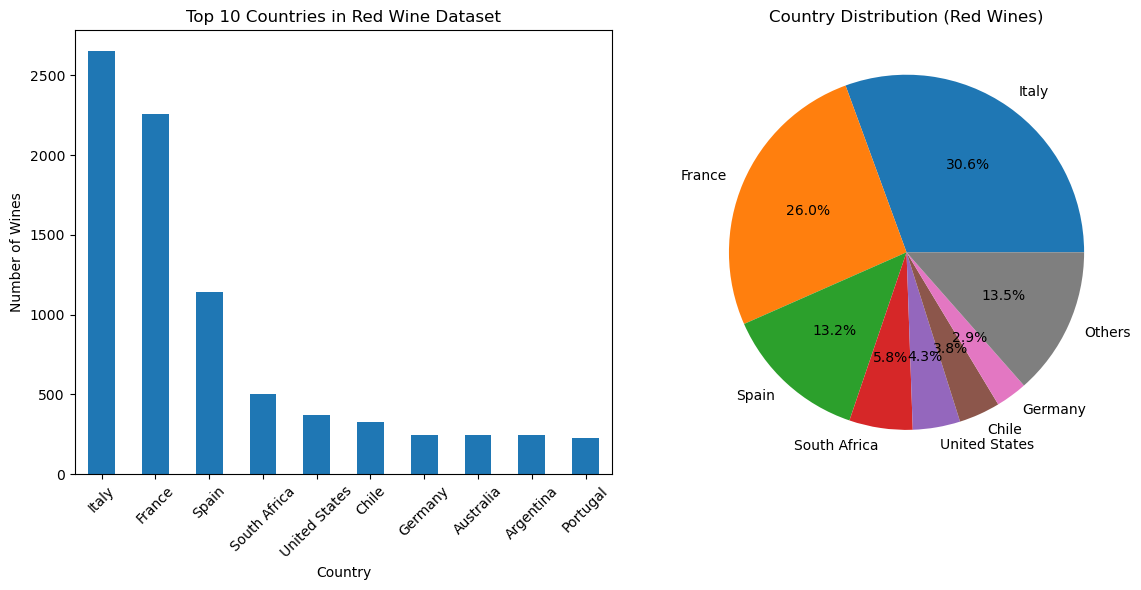

In [46]:
# Country Distribution - Bar Chart
plt.figure(figsize=(12, 6))
country_counts = df_red_cost['Country'].value_counts()
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries in Red Wine Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# Country Distribution - Pie Chart (top 8 + others)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(7)
others = pd.Series([country_counts.tail(-7).sum()], index=['Others'])
pie_data = pd.concat([top_countries, others])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Country Distribution (Red Wines)')
plt.tight_layout()
plt.show()

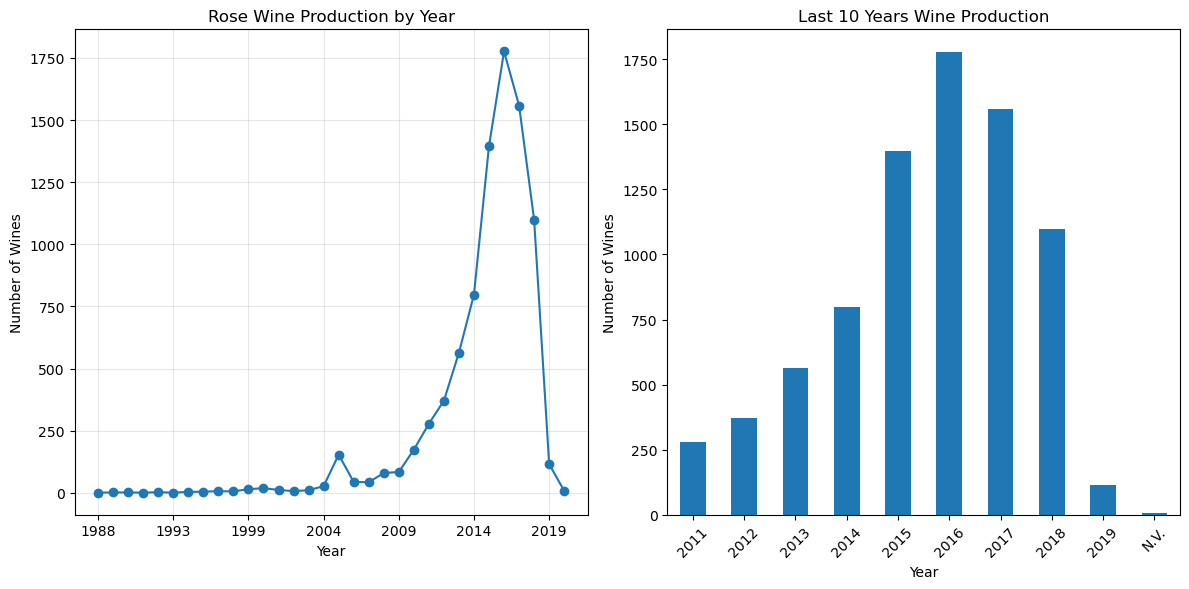

In [47]:
# Vintage Year Distribution
plt.figure(figsize=(12, 6))
year_counts = df_red_cost['Year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o')
plt.title('Rose Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
year_counts.tail(10).plot(kind='bar')
plt.title('Last 10 Years Wine Production')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

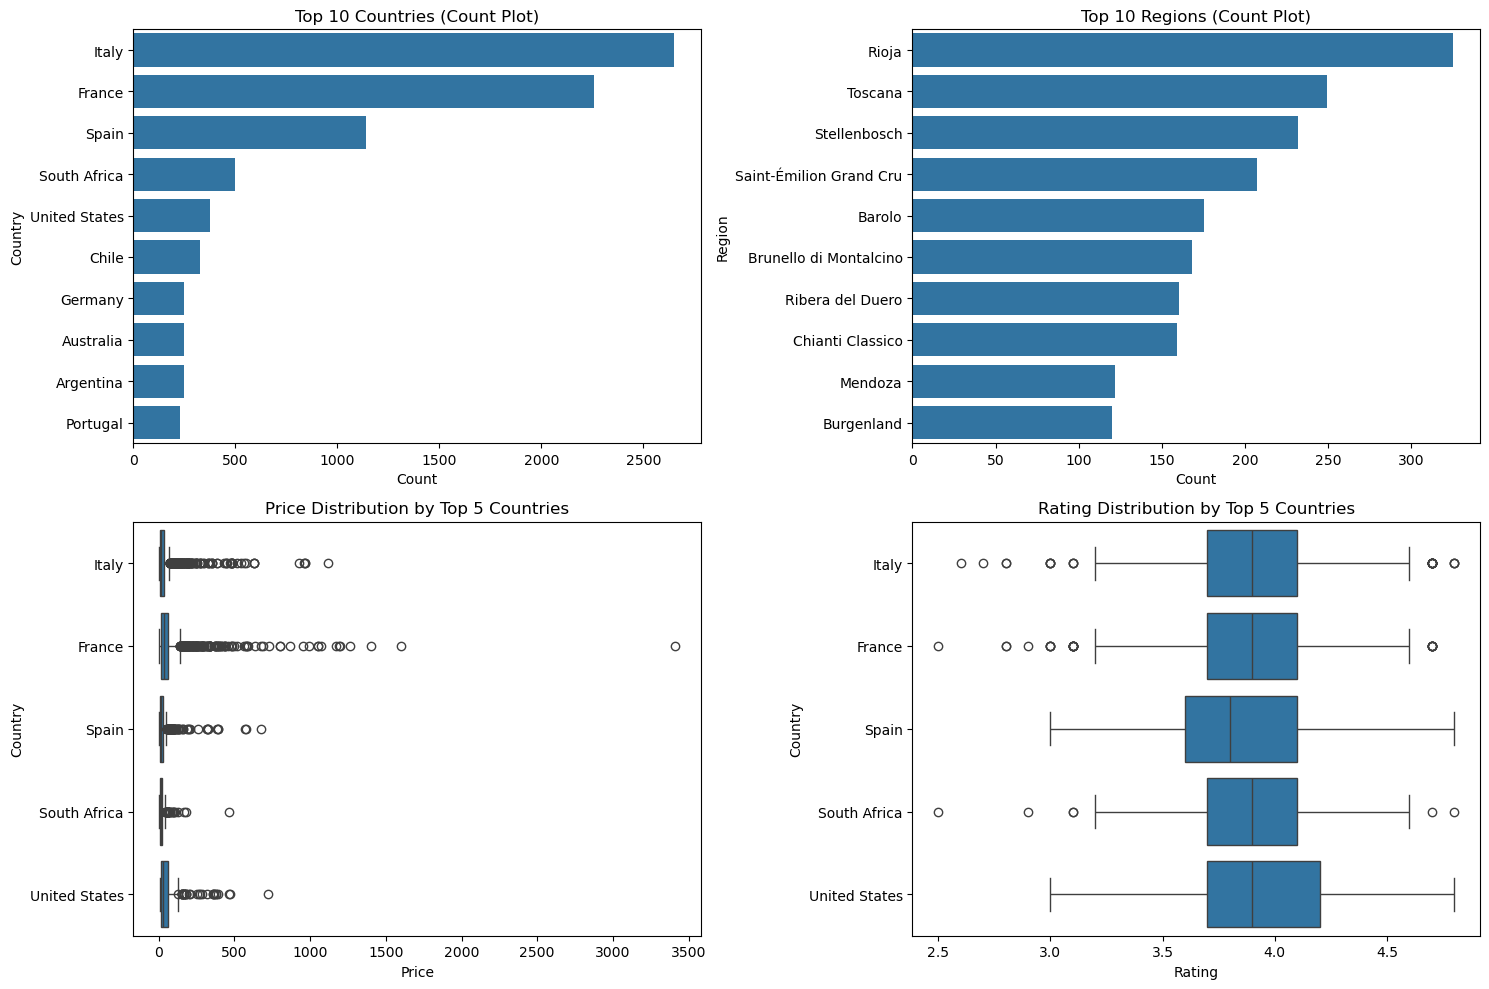

In [48]:
# Using Seaborn for better categorical visualizations
plt.figure(figsize=(15, 10))

# Count plot for countries
plt.subplot(2, 2, 1)
sns.countplot(data=df_red_cost, y='Country', order=df_red_cost['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries (Count Plot)')
plt.xlabel('Count')

# Count plot for regions (top 10)
plt.subplot(2, 2, 2)
top_regions = df_red_cost['Region'].value_counts().head(10).index
sns.countplot(data=df_red_cost[df_red_cost['Region'].isin(top_regions)], y='Region', 
              order=top_regions)
plt.title('Top 10 Regions (Count Plot)')
plt.xlabel('Count')

# Box plot: Price by Country (top 5 countries)
plt.subplot(2, 2, 3)
top_5_countries = df_red_cost['Country'].value_counts().head(5).index
sns.boxplot(data=df_red_cost[df_red_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Top 5 Countries')

# Box plot: Rating by Country (top 5 countries)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_red_cost[df_red_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Rating', order=top_5_countries)
plt.title('Rating Distribution by Top 5 Countries')

plt.tight_layout()
plt.show()

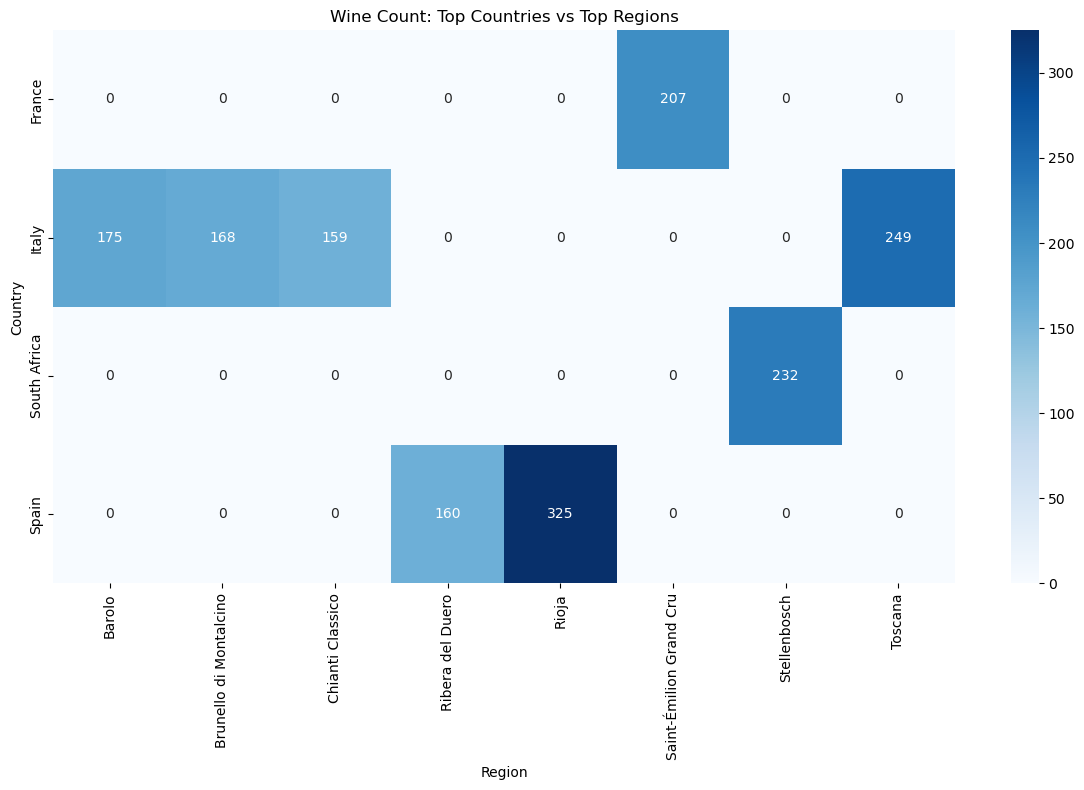

In [49]:
# Relationship between categorical variables - Heatmap
plt.figure(figsize=(12, 8))

# Create a crosstab between Country and Region (top countries and regions only)
top_countries = df_red_cost['Country'].value_counts().head(5).index
top_regions = df_red_cost['Region'].value_counts().head(8).index

# Filter data for top countries and regions
filtered_data = df_red_cost[
    (df_red_cost['Country'].isin(top_countries)) & 
    (df_red_cost['Region'].isin(top_regions))
]

if not filtered_data.empty:
    crosstab = pd.crosstab(filtered_data['Country'], filtered_data['Region'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Wine Count: Top Countries vs Top Regions')
    plt.xlabel('Region')
    plt.ylabel('Country')
else:
    print("No overlapping data between top countries and regions")

plt.tight_layout()
plt.show()

c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


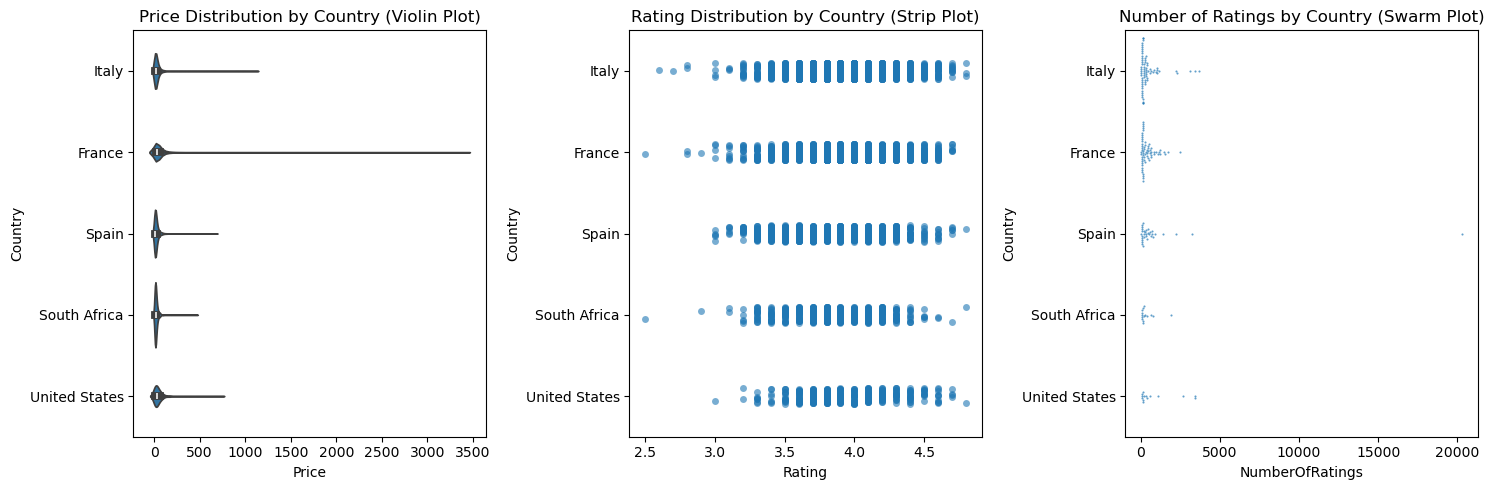

In [50]:
# Advanced categorical visualization - Violin plots
plt.figure(figsize=(15, 5))

# Violin plot: Price distribution by top countries
plt.subplot(1, 3, 1)
top_5_countries = df_red_cost['Country'].value_counts().head(5).index
sns.violinplot(data=df_red_cost[df_red_cost['Country'].isin(top_5_countries)], 
               y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Country (Violin Plot)')

# Strip plot: Rating vs Country
plt.subplot(1, 3, 2)
sns.stripplot(data=df_red_cost[df_red_cost['Country'].isin(top_5_countries)], 
              y='Country', x='Rating', order=top_5_countries, alpha=0.6)
plt.title('Rating Distribution by Country (Strip Plot)')

# Swarm plot: NumberOfRatings vs Country (smaller markers to fit more data)
plt.subplot(1, 3, 3)
sample_data = df_red_cost[df_red_cost['Country'].isin(top_5_countries)].sample(n=min(200, len(df_red_cost)), random_state=42)
sns.swarmplot(data=sample_data, y='Country', x='NumberOfRatings', 
              order=top_5_countries, size=1.5, alpha=0.7)
plt.title('Number of Ratings by Country (Swarm Plot)')

plt.tight_layout()
plt.show()

In [51]:
# Summary statistics for categorical variables
print("=== CATEGORICAL VARIABLE SUMMARY ===\n")

print("Country Distribution:")
print(df_red_cost['Country'].value_counts().head(10))
print(f"Total unique countries: {df_red_cost['Country'].nunique()}")

print("\nRegion Distribution:")
print(df_red_cost['Region'].value_counts().head(10))
print(f"Total unique regions: {df_red_cost['Region'].nunique()}")

print("\nWinery Distribution:")
print(df_red_cost['Winery'].value_counts().head(10))
print(f"Total unique wineries: {df_red_cost['Winery'].nunique()}")

print("\nYear Distribution:")
print(df_red_cost['Year'].value_counts().sort_index().tail(10))
print(f"Year range: {df_red_cost['Year'].min()} - {df_red_cost['Year'].max()}")

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
categorical_cols = ['Name', 'Country', 'Region', 'Winery', 'Year']
for col in categorical_cols:
    missing = df_rose_cost[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(df_rose_cost)*100:.1f}%)")

=== CATEGORICAL VARIABLE SUMMARY ===

Country Distribution:
Country
Italy            2650
France           2256
Spain            1142
South Africa      500
United States     374
Chile             326
Germany           248
Australia         246
Argentina         246
Portugal          230
Name: count, dtype: int64
Total unique countries: 30

Region Distribution:
Region
Rioja                      325
Toscana                    249
Stellenbosch               232
Saint-Émilion Grand Cru    207
Barolo                     175
Brunello di Montalcino     168
Ribera del Duero           160
Chianti Classico           159
Mendoza                    122
Burgenland                 120
Name: count, dtype: int64
Total unique regions: 624

Winery Distribution:
Winery
Errazuriz                 40
Gaja                      32
Château de Saint Cosme    32
Torres                    31
M. Chapoutier             31
Joseph Drouhin            28
Delas                     27
Paul Jaboulet Aîné        26
Penfold

### White Categorical Data Visualization
Now let's create visualizations specifically for the object-type (categorical) variables in our wine datasets.

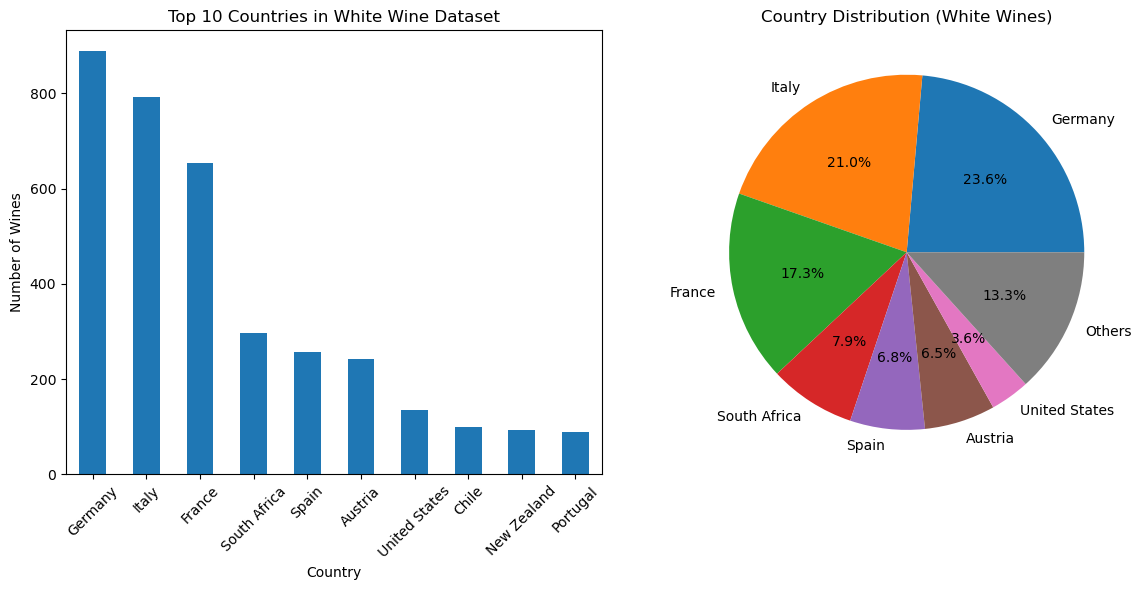

In [52]:
# 1. Country Distribution - Bar Chart
plt.figure(figsize=(12, 6))
country_counts = df_white_cost['Country'].value_counts()
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries in White Wine Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# 2. Country Distribution - Pie Chart (top 8 + others)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(7)
others = pd.Series([country_counts.tail(-7).sum()], index=['Others'])
pie_data = pd.concat([top_countries, others])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Country Distribution (White Wines)')
plt.tight_layout()
plt.show()

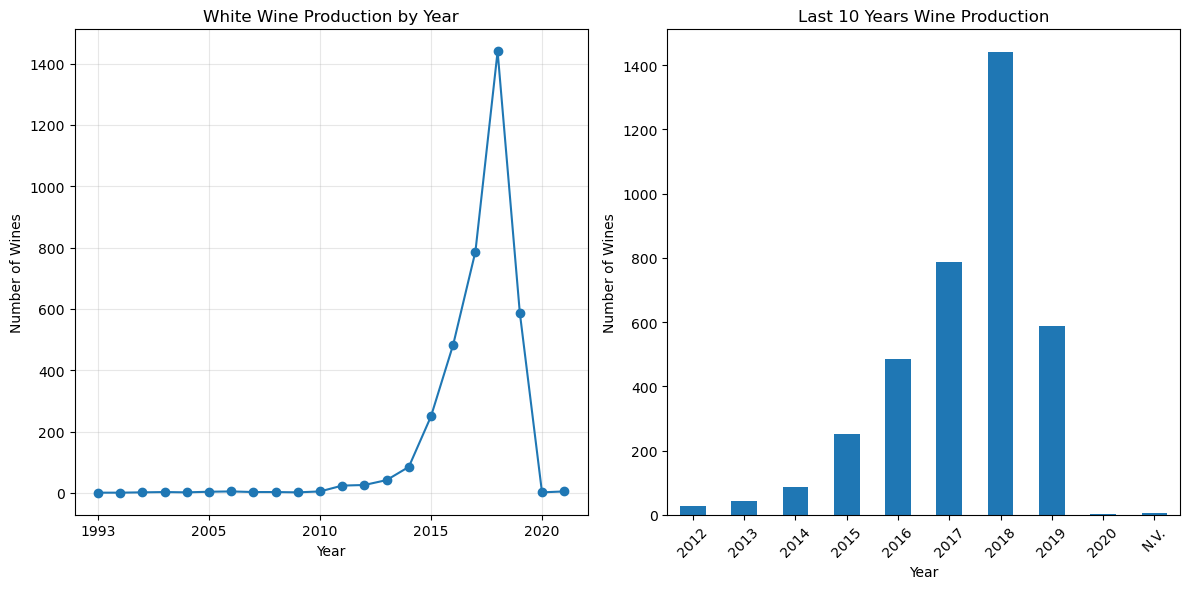

In [53]:
# 3. Vintage Year Distribution
plt.figure(figsize=(12, 6))
year_counts = df_white_cost['Year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o')
plt.title('White Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
year_counts.tail(10).plot(kind='bar')
plt.title('Last 10 Years Wine Production')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

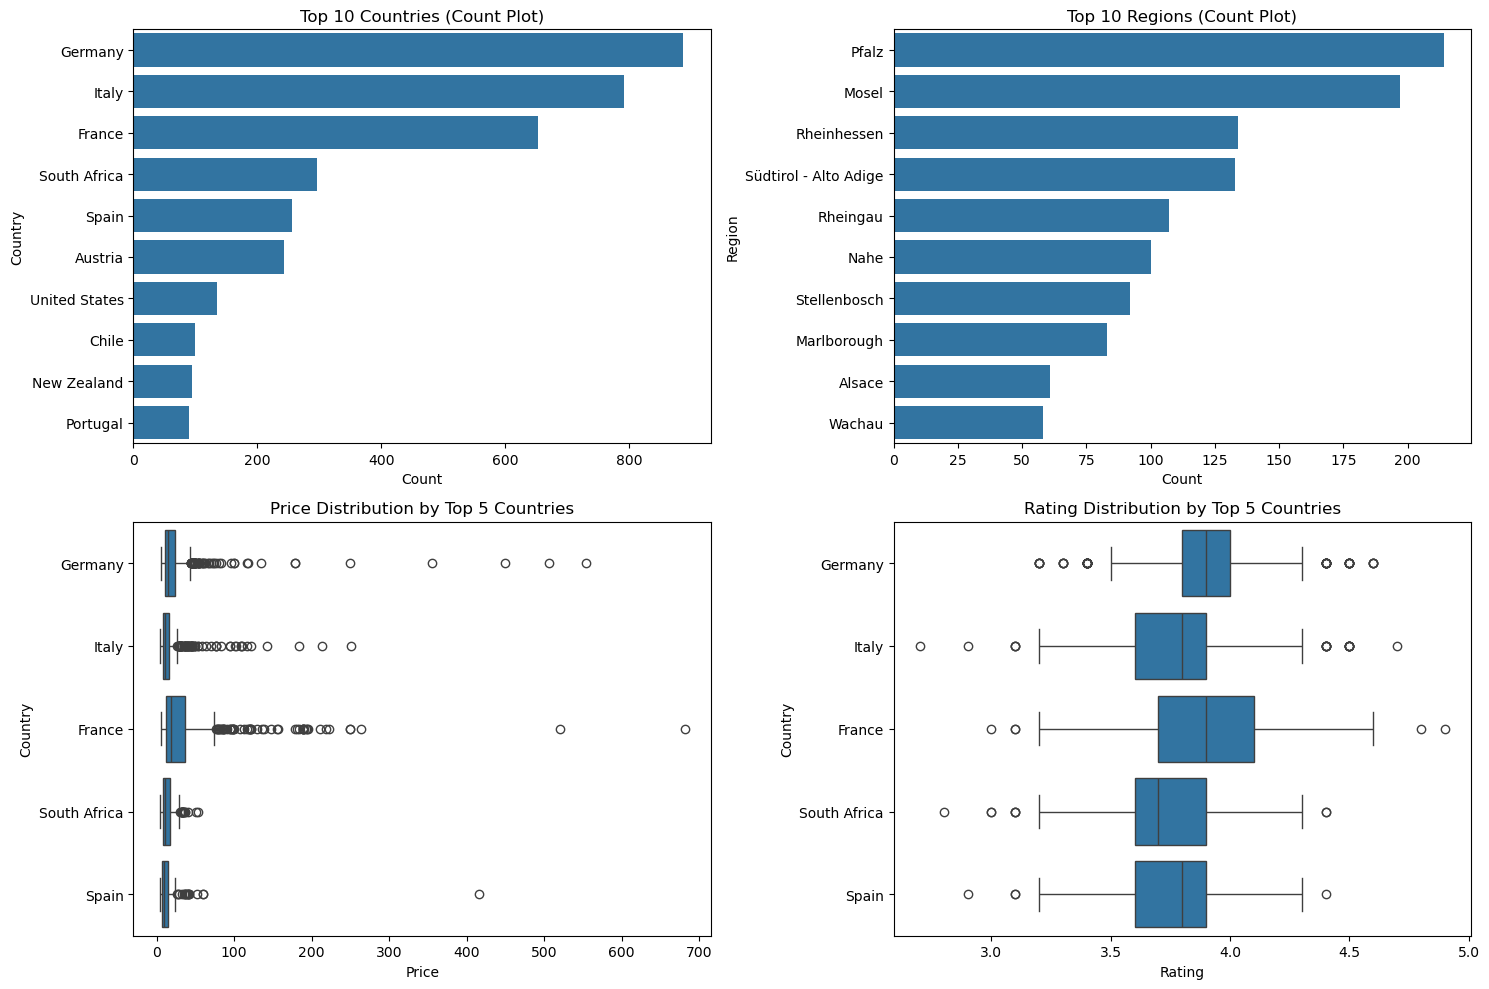

In [54]:
# 4. Using Seaborn for better categorical visualizations
plt.figure(figsize=(15, 10))

# Count plot for countries
plt.subplot(2, 2, 1)
sns.countplot(data=df_white_cost, y='Country', order=df_white_cost['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries (Count Plot)')
plt.xlabel('Count')

# Count plot for regions (top 10)
plt.subplot(2, 2, 2)
top_regions = df_white_cost['Region'].value_counts().head(10).index
sns.countplot(data=df_white_cost[df_white_cost['Region'].isin(top_regions)], y='Region', 
              order=top_regions)
plt.title('Top 10 Regions (Count Plot)')
plt.xlabel('Count')

# Box plot: Price by Country (top 5 countries)
plt.subplot(2, 2, 3)
top_5_countries = df_white_cost['Country'].value_counts().head(5).index
sns.boxplot(data=df_white_cost[df_white_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Top 5 Countries')

# Box plot: Rating by Country (top 5 countries)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_white_cost[df_white_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Rating', order=top_5_countries)
plt.title('Rating Distribution by Top 5 Countries')

plt.tight_layout()
plt.show()

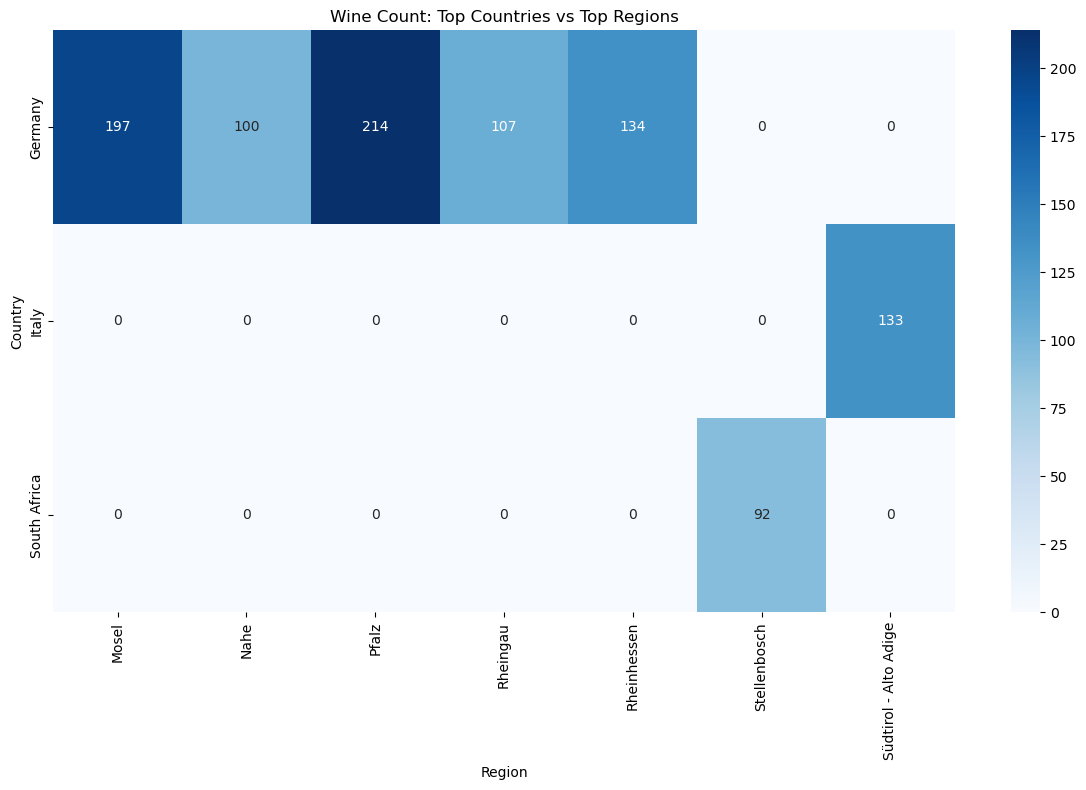

In [55]:
# 5. Relationship between categorical variables - Heatmap
plt.figure(figsize=(12, 8))

# Create a crosstab between Country and Region (top countries and regions only)
top_countries = df_white_cost['Country'].value_counts().head(5).index
top_regions = df_white_cost['Region'].value_counts().head(8).index

# Filter data for top countries and regions
filtered_data = df_white_cost[
    (df_white_cost['Country'].isin(top_countries)) & 
    (df_white_cost['Region'].isin(top_regions))
]

if not filtered_data.empty:
    crosstab = pd.crosstab(filtered_data['Country'], filtered_data['Region'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Wine Count: Top Countries vs Top Regions')
    plt.xlabel('Region')
    plt.ylabel('Country')
else:
    print("No overlapping data between top countries and regions")

plt.tight_layout()
plt.show()

c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\silla\anaconda3\envs\engg2112\Lib\site-

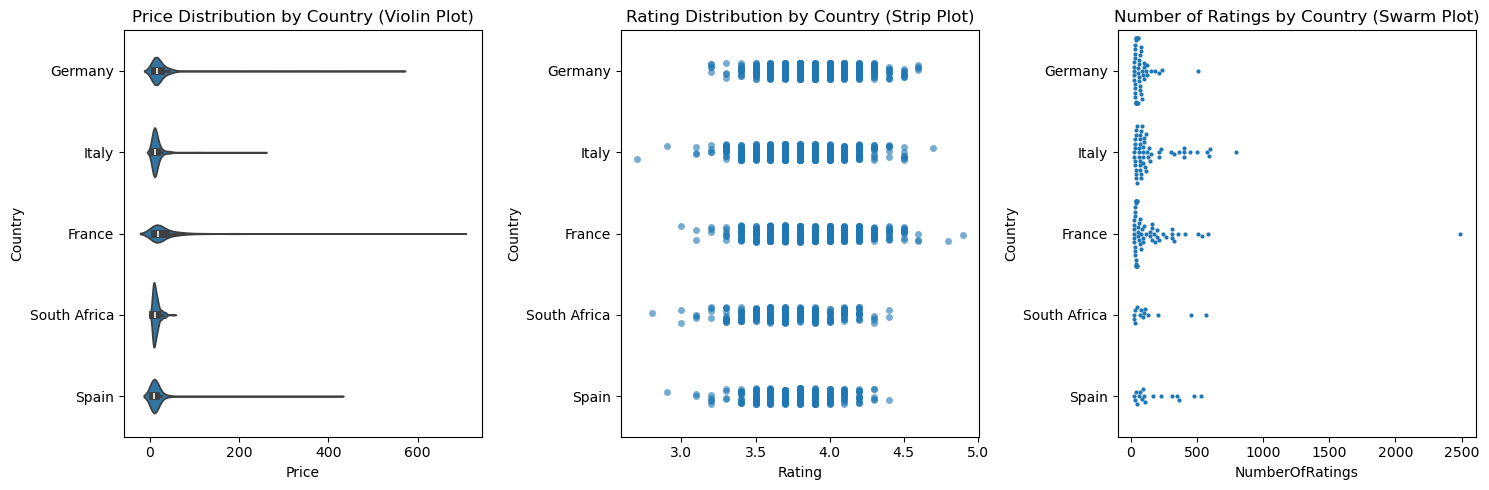

In [56]:
# 6. Advanced categorical visualization - Violin plots
plt.figure(figsize=(15, 5))

# Violin plot: Price distribution by top countries
plt.subplot(1, 3, 1)
top_5_countries = df_white_cost['Country'].value_counts().head(5).index
sns.violinplot(data=df_white_cost[df_white_cost['Country'].isin(top_5_countries)], 
               y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Country (Violin Plot)')

# Strip plot: Rating vs Country
plt.subplot(1, 3, 2)
sns.stripplot(data=df_white_cost[df_white_cost['Country'].isin(top_5_countries)], 
              y='Country', x='Rating', order=top_5_countries, alpha=0.6)
plt.title('Rating Distribution by Country (Strip Plot)')

# Swarm plot: NumberOfRatings vs Country (sample data to avoid overcrowding)
plt.subplot(1, 3, 3)
sample_data = df_white_cost[df_white_cost['Country'].isin(top_5_countries)].sample(n=min(200, len(df_white_cost)), random_state=42)
sns.swarmplot(data=sample_data, y='Country', x='NumberOfRatings', 
              order=top_5_countries, size=3)
plt.title('Number of Ratings by Country (Swarm Plot)')

plt.tight_layout()
plt.show()

In [57]:
# 7. Summary statistics for categorical variables
print("=== CATEGORICAL VARIABLE SUMMARY ===\n")

print("Country Distribution:")
print(df_white_cost['Country'].value_counts().head(10))
print(f"Total unique countries: {df_white_cost['Country'].nunique()}")

print("\nRegion Distribution:")
print(df_white_cost['Region'].value_counts().head(10))
print(f"Total unique regions: {df_white_cost['Region'].nunique()}")

print("\nWinery Distribution:")
print(df_white_cost['Winery'].value_counts().head(10))
print(f"Total unique wineries: {df_white_cost['Winery'].nunique()}")

print("\nYear Distribution:")
print(df_white_cost['Year'].value_counts().sort_index().tail(10))
print(f"Year range: {df_white_cost['Year'].min()} - {df_white_cost['Year'].max()}")

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
categorical_cols = ['Name', 'Country', 'Region', 'Winery', 'Year']
for col in categorical_cols:
    missing = df_white_cost[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(df_white_cost)*100:.1f}%)")

=== CATEGORICAL VARIABLE SUMMARY ===

Country Distribution:
Country
Germany          888
Italy            792
France           653
South Africa     296
Spain            256
Austria          243
United States    135
Chile             99
New Zealand       94
Portugal          89
Name: count, dtype: int64
Total unique countries: 30

Region Distribution:
Region
Pfalz                    214
Mosel                    197
Rheinhessen              134
Südtirol - Alto Adige    133
Rheingau                 107
Nahe                     100
Stellenbosch              92
Marlborough               83
Alsace                    61
Wachau                    58
Name: count, dtype: int64
Total unique regions: 457

Winery Distribution:
Winery
Markus Molitor       61
Von Winning          34
Wittmann             29
Joseph Drouhin       23
Emrich-Schönleber    23
Van Volxem           21
Schloss Lieser       19
Gut Hermannsberg     19
Torres               18
Dönnhoff             18
Name: count, dtype: int64
Tot

### Rose Categorical Data Visualization
Now let's create visualizations specifically for the object-type (categorical) variables in our wine datasets.

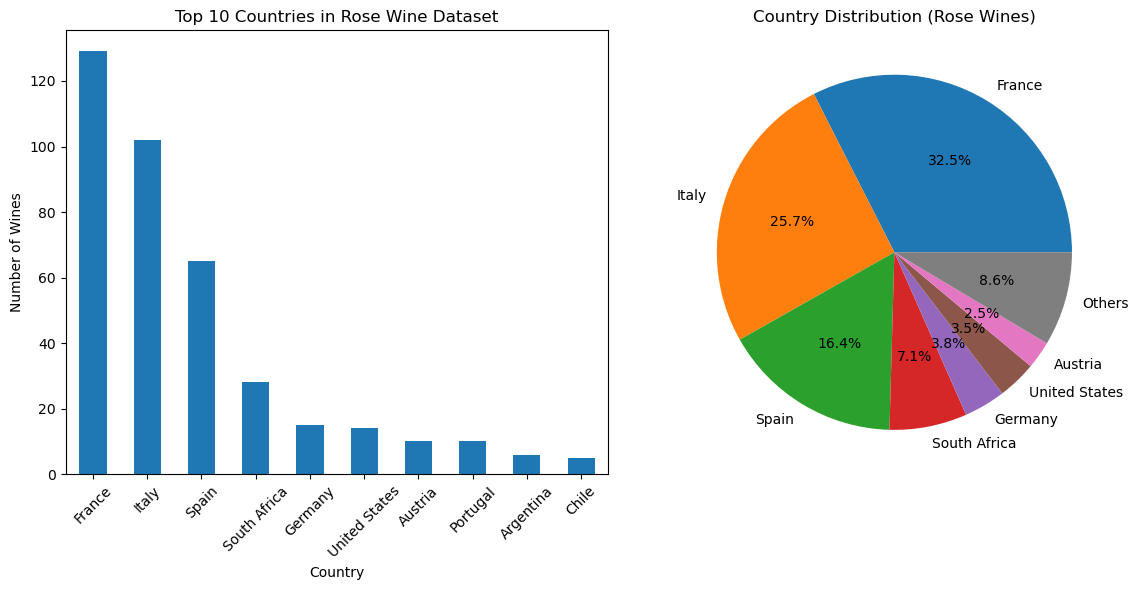

In [58]:
# 1. Country Distribution - Bar Chart
plt.figure(figsize=(12, 6))
country_counts = df_rose_cost['Country'].value_counts()
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries in Rose Wine Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# 2. Country Distribution - Pie Chart (top 8 + others)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(7)
others = pd.Series([country_counts.tail(-7).sum()], index=['Others'])
pie_data = pd.concat([top_countries, others])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Country Distribution (Rose Wines)')
plt.tight_layout()
plt.show()

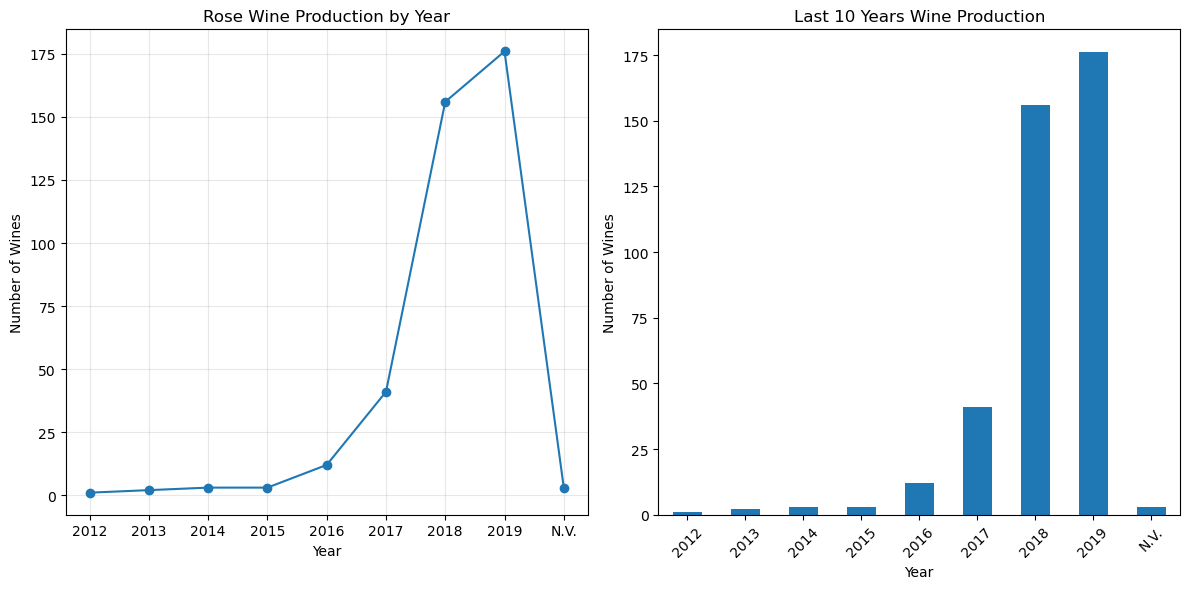

In [59]:
# 3. Vintage Year Distribution
plt.figure(figsize=(12, 6))
year_counts = df_rose_cost['Year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o')
plt.title('Rose Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
year_counts.tail(10).plot(kind='bar')
plt.title('Last 10 Years Wine Production')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

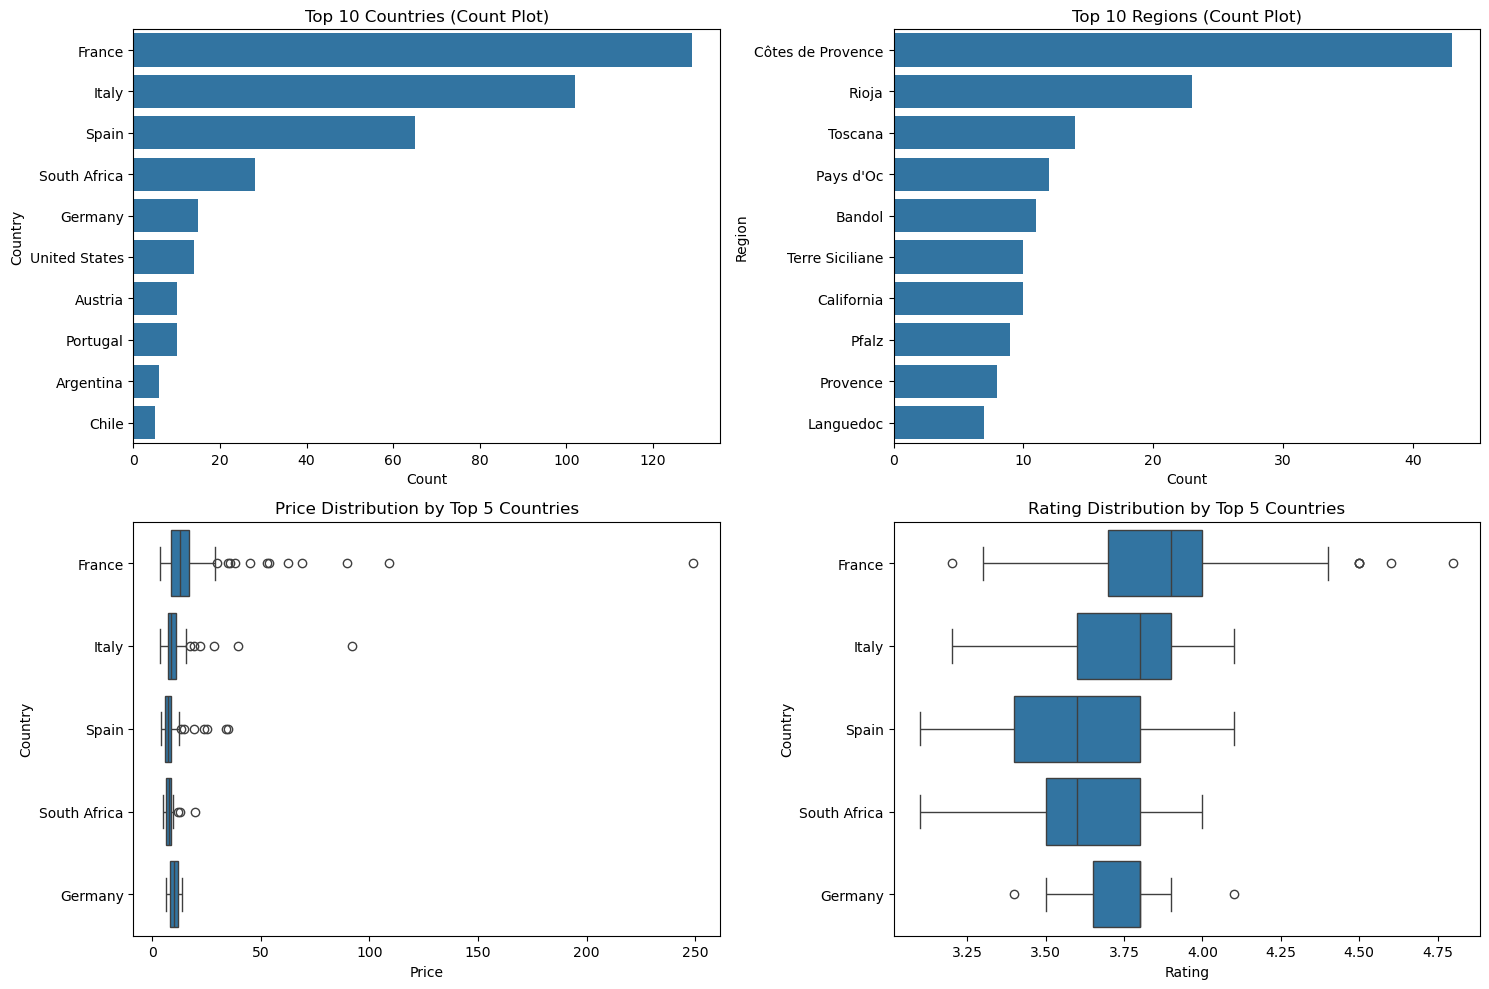

In [60]:
# 4. Using Seaborn for better categorical visualizations
plt.figure(figsize=(15, 10))

# Count plot for countries
plt.subplot(2, 2, 1)
sns.countplot(data=df_rose_cost, y='Country', order=df_rose_cost['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries (Count Plot)')
plt.xlabel('Count')

# Count plot for regions (top 10)
plt.subplot(2, 2, 2)
top_regions = df_rose_cost['Region'].value_counts().head(10).index
sns.countplot(data=df_rose_cost[df_rose_cost['Region'].isin(top_regions)], y='Region', 
              order=top_regions)
plt.title('Top 10 Regions (Count Plot)')
plt.xlabel('Count')

# Box plot: Price by Country (top 5 countries)
plt.subplot(2, 2, 3)
top_5_countries = df_rose_cost['Country'].value_counts().head(5).index
sns.boxplot(data=df_rose_cost[df_rose_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Top 5 Countries')

# Box plot: Rating by Country (top 5 countries)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_rose_cost[df_rose_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Rating', order=top_5_countries)
plt.title('Rating Distribution by Top 5 Countries')

plt.tight_layout()
plt.show()

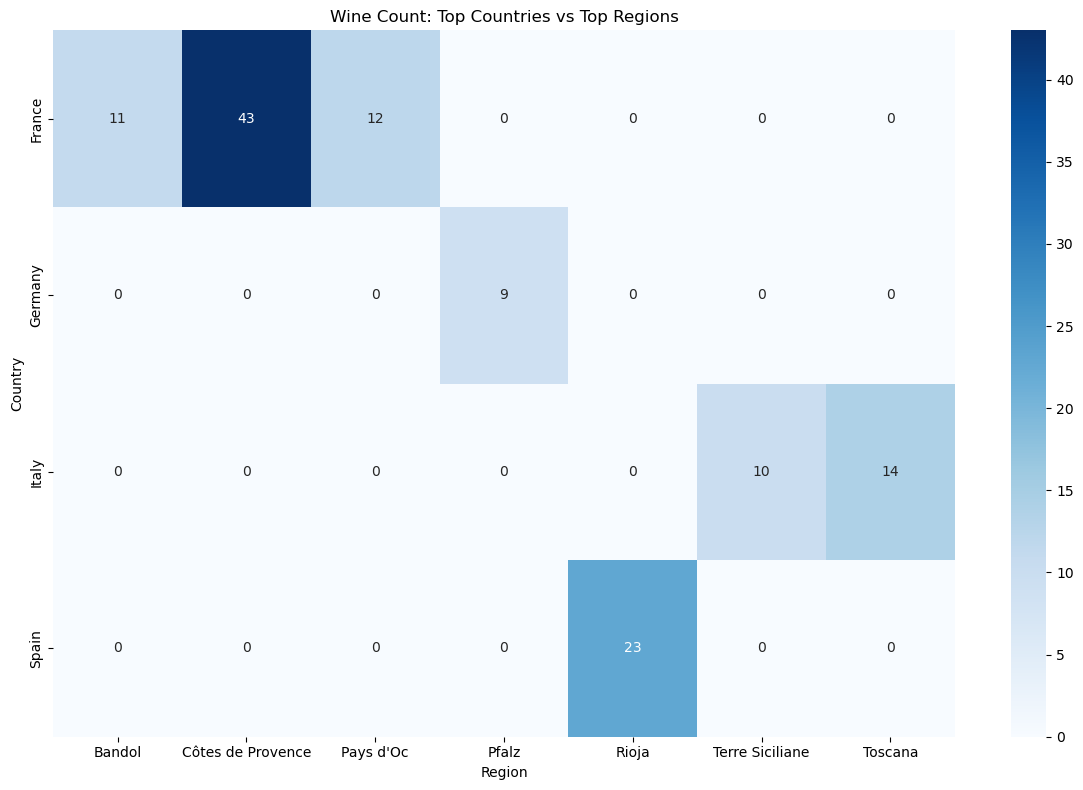

In [61]:
# 5. Relationship between categorical variables - Heatmap
plt.figure(figsize=(12, 8))

# Create a crosstab between Country and Region (top countries and regions only)
top_countries = df_rose_cost['Country'].value_counts().head(5).index
top_regions = df_rose_cost['Region'].value_counts().head(8).index

# Filter data for top countries and regions
filtered_data = df_rose_cost[
    (df_rose_cost['Country'].isin(top_countries)) & 
    (df_rose_cost['Region'].isin(top_regions))
]

if not filtered_data.empty:
    crosstab = pd.crosstab(filtered_data['Country'], filtered_data['Region'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Wine Count: Top Countries vs Top Regions')
    plt.xlabel('Region')
    plt.ylabel('Country')
else:
    print("No overlapping data between top countries and regions")

plt.tight_layout()
plt.show()

c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


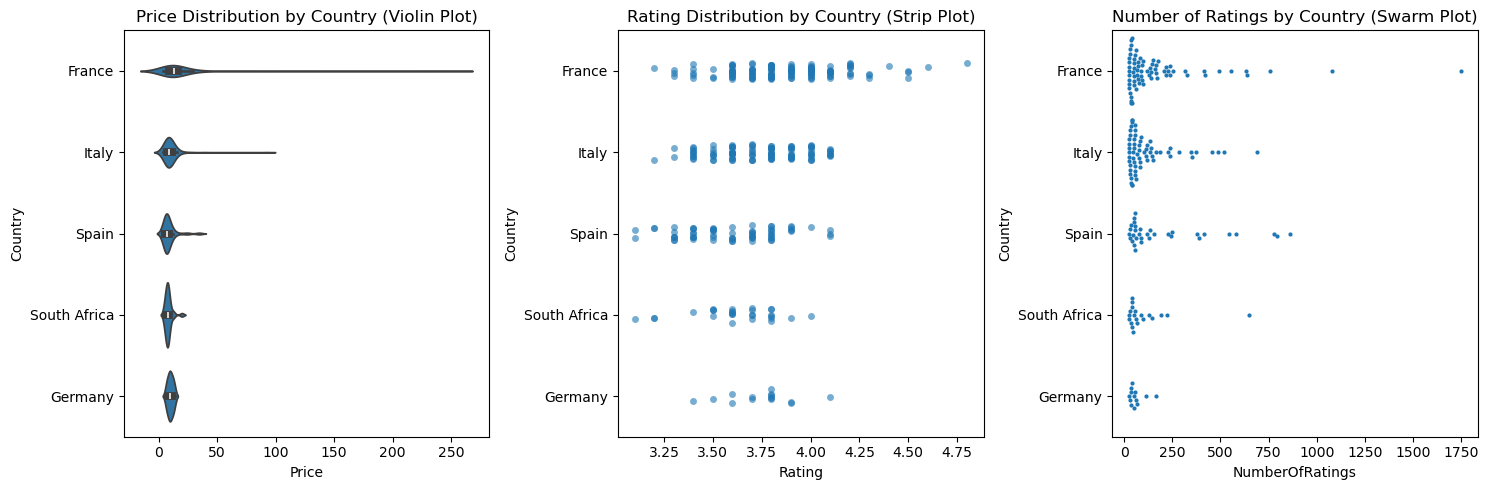

In [62]:
# 6. Advanced categorical visualization - Violin plots
plt.figure(figsize=(15, 5))

# Violin plot: Price distribution by top countries
plt.subplot(1, 3, 1)
top_5_countries = df_rose_cost['Country'].value_counts().head(5).index
sns.violinplot(data=df_rose_cost[df_rose_cost['Country'].isin(top_5_countries)], 
               y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Country (Violin Plot)')

# Strip plot: Rating vs Country
plt.subplot(1, 3, 2)
sns.stripplot(data=df_rose_cost[df_rose_cost['Country'].isin(top_5_countries)], 
              y='Country', x='Rating', order=top_5_countries, alpha=0.6)
plt.title('Rating Distribution by Country (Strip Plot)')

# Swarm plot: NumberOfRatings vs Country (sample data to avoid overcrowding)
plt.subplot(1, 3, 3)
sample_data = df_rose_cost[df_rose_cost['Country'].isin(top_5_countries)].sample(n=min(200, len(df_rose_cost)), random_state=42)
sns.swarmplot(data=sample_data, y='Country', x='NumberOfRatings', 
              order=top_5_countries, size=3)
plt.title('Number of Ratings by Country (Swarm Plot)')

plt.tight_layout()
plt.show()

In [63]:
# 7. Summary statistics for categorical variables
print("=== CATEGORICAL VARIABLE SUMMARY ===\n")

print("Country Distribution:")
print(df_rose_cost['Country'].value_counts().head(10))
print(f"Total unique countries: {df_rose_cost['Country'].nunique()}")

print("\nRegion Distribution:")
print(df_rose_cost['Region'].value_counts().head(10))
print(f"Total unique regions: {df_rose_cost['Region'].nunique()}")

print("\nWinery Distribution:")
print(df_rose_cost['Winery'].value_counts().head(10))
print(f"Total unique wineries: {df_rose_cost['Winery'].nunique()}")

print("\nYear Distribution:")
print(df_rose_cost['Year'].value_counts().sort_index().tail(10))
print(f"Year range: {df_rose_cost['Year'].min()} - {df_rose_cost['Year'].max()}")

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
categorical_cols = ['Name', 'Country', 'Region', 'Winery', 'Year']
for col in categorical_cols:
    missing = df_rose_cost[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(df_rose_cost)*100:.1f}%)")

=== CATEGORICAL VARIABLE SUMMARY ===

Country Distribution:
Country
France           129
Italy            102
Spain             65
South Africa      28
Germany           15
United States     14
Austria           10
Portugal          10
Argentina          6
Chile              5
Name: count, dtype: int64
Total unique countries: 16

Region Distribution:
Region
Côtes de Provence    43
Rioja                23
Toscana              14
Pays d'Oc            12
Bandol               11
Terre Siciliane      10
California           10
Pfalz                 9
Provence              8
Languedoc             7
Name: count, dtype: int64
Total unique regions: 129

Winery Distribution:
Winery
Château d'Esclans              7
Domaines Ott                   6
Torres                         5
Ramón Bilbao                   4
Protos                         4
Château La Tour de l'Évêque    4
Les Jamelles                   4
Minuty                         4
Mulderbosch                    3
Muga                  

### Sparkling Categorical Data Visualization
Now let's create visualizations specifically for the object-type (categorical) variables in our wine datasets.

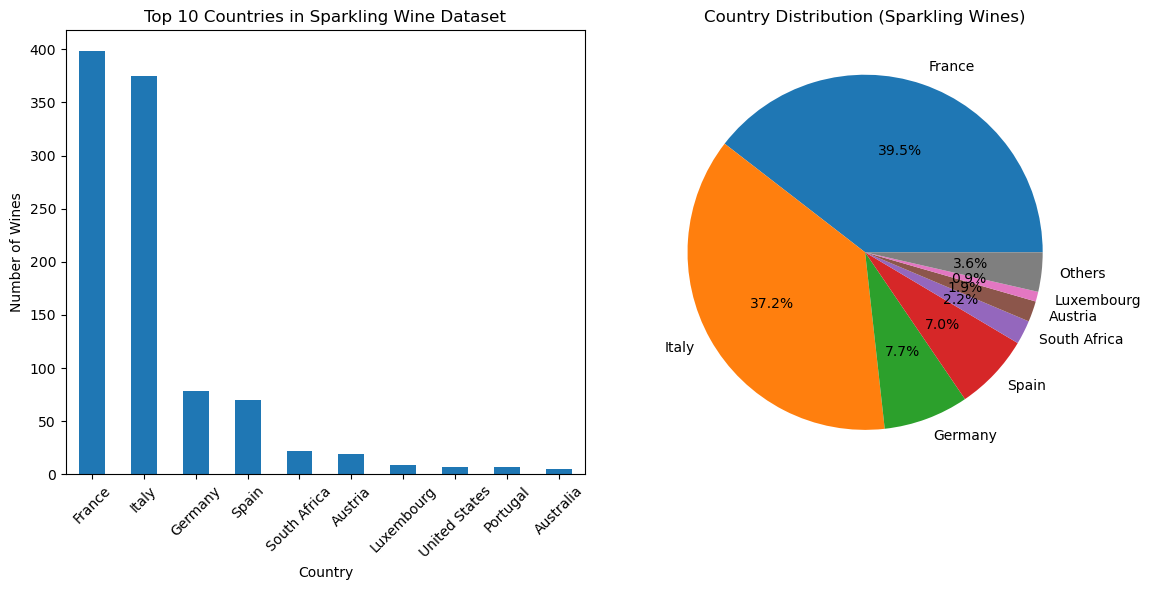

In [64]:
# 1. Country Distribution - Bar Chart
plt.figure(figsize=(12, 6))
country_counts = df_sparkling_cost['Country'].value_counts()
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries in Sparkling Wine Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# 2. Country Distribution - Pie Chart (top 8 + others)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(7)
others = pd.Series([country_counts.tail(-7).sum()], index=['Others'])
pie_data = pd.concat([top_countries, others])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Country Distribution (Sparkling Wines)')
plt.tight_layout()
plt.show()

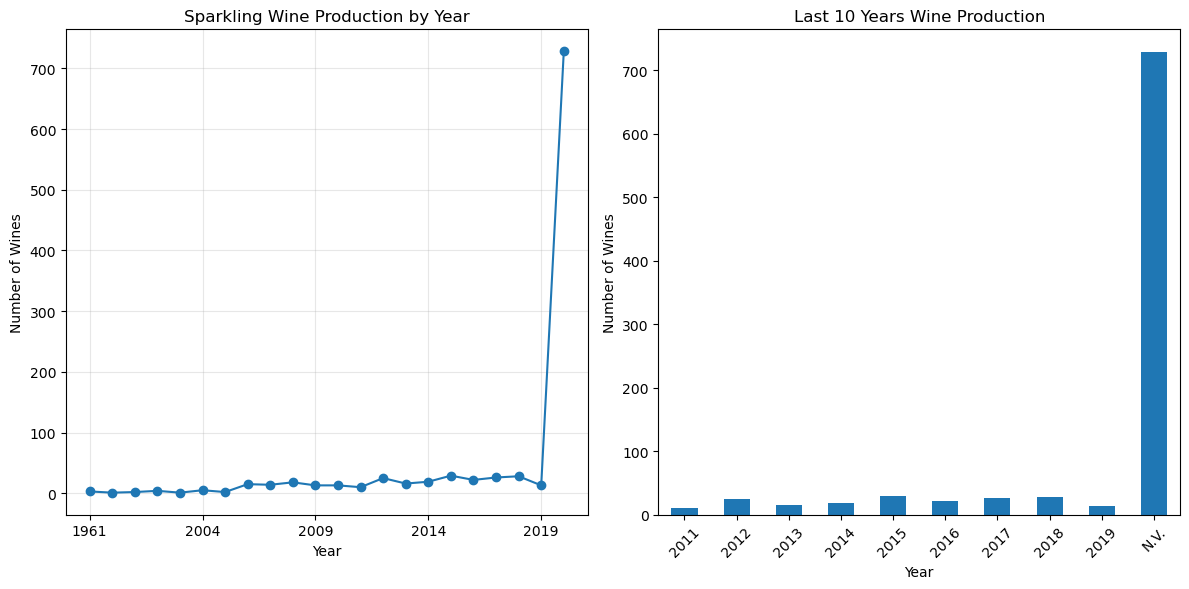

In [65]:
# 3. Vintage Year Distribution
plt.figure(figsize=(12, 6))
year_counts = df_sparkling_cost['Year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o')
plt.title('Sparkling Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
year_counts.tail(10).plot(kind='bar')
plt.title('Last 10 Years Wine Production')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

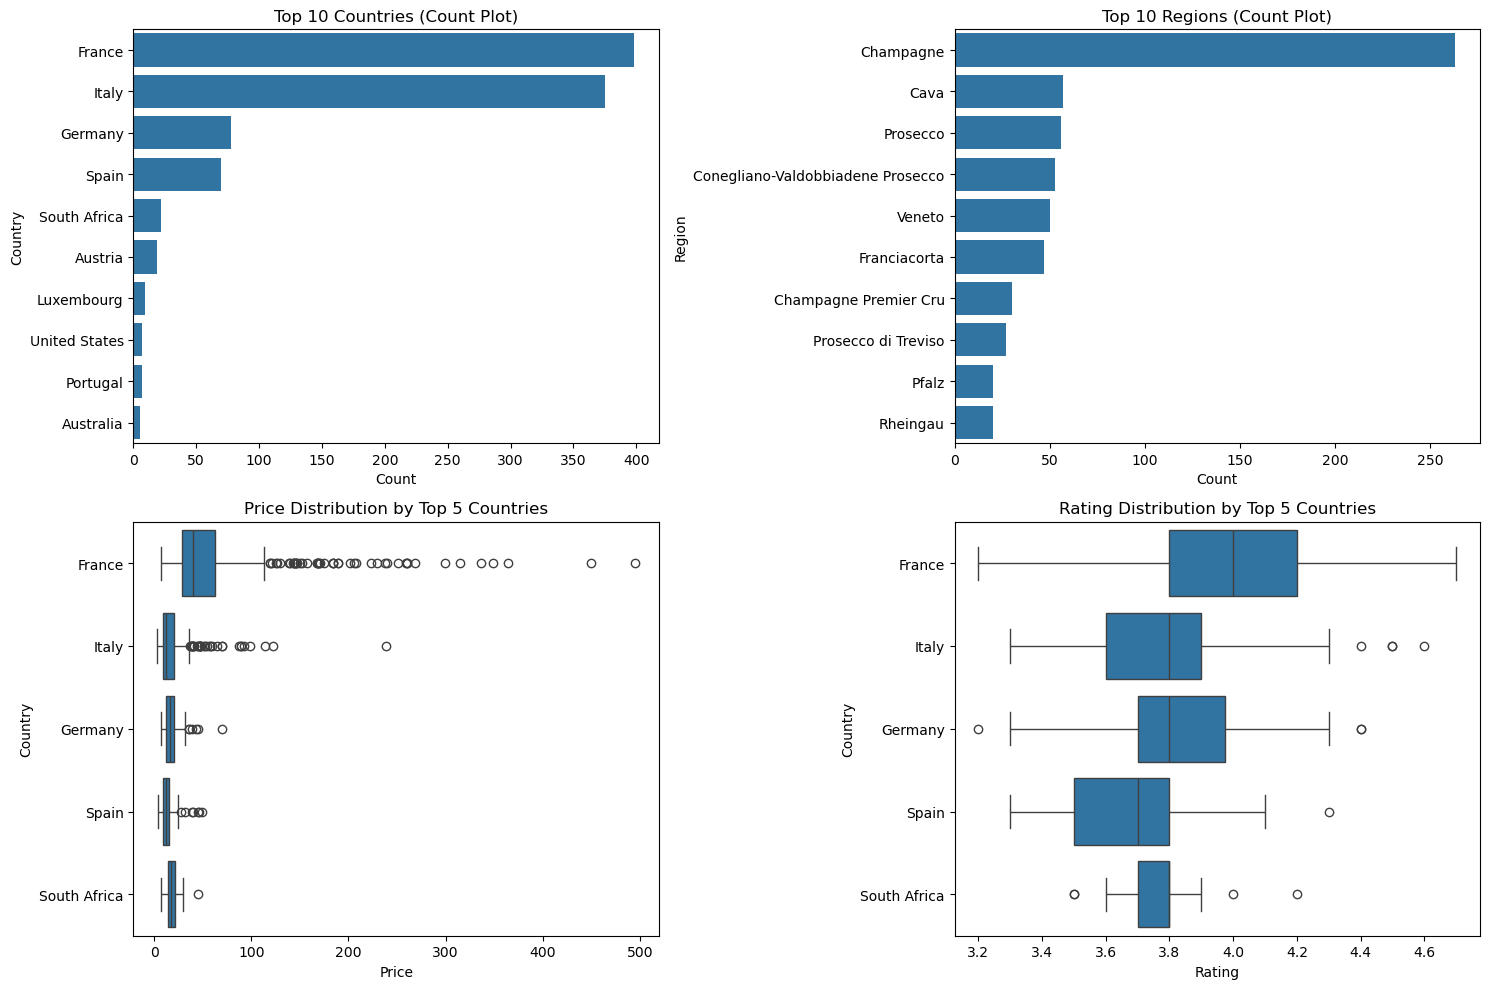

In [66]:
# 4. Using Seaborn for better categorical visualizations
plt.figure(figsize=(15, 10))

# Count plot for countries
plt.subplot(2, 2, 1)
sns.countplot(data=df_sparkling_cost, y='Country', order=df_sparkling_cost['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries (Count Plot)')
plt.xlabel('Count')

# Count plot for regions (top 10)
plt.subplot(2, 2, 2)
top_regions = df_sparkling_cost['Region'].value_counts().head(10).index
sns.countplot(data=df_sparkling_cost[df_sparkling_cost['Region'].isin(top_regions)], y='Region', 
              order=top_regions)
plt.title('Top 10 Regions (Count Plot)')
plt.xlabel('Count')

# Box plot: Price by Country (top 5 countries)
plt.subplot(2, 2, 3)
top_5_countries = df_sparkling_cost['Country'].value_counts().head(5).index
sns.boxplot(data=df_sparkling_cost[df_sparkling_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Top 5 Countries')

# Box plot: Rating by Country (top 5 countries)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_sparkling_cost[df_sparkling_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Rating', order=top_5_countries)
plt.title('Rating Distribution by Top 5 Countries')

plt.tight_layout()
plt.show()

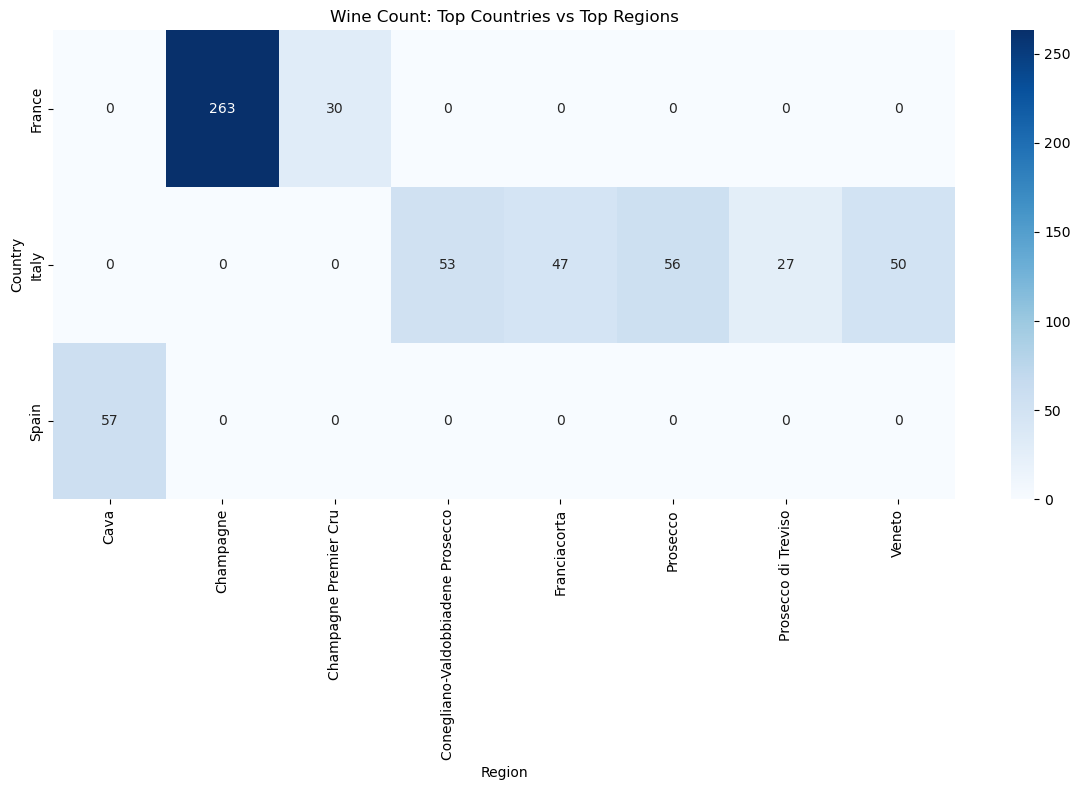

In [67]:
# 5. Relationship between categorical variables - Heatmap
plt.figure(figsize=(12, 8))

# Create a crosstab between Country and Region (top countries and regions only)
top_countries = df_sparkling_cost['Country'].value_counts().head(5).index
top_regions = df_sparkling_cost['Region'].value_counts().head(8).index

# Filter data for top countries and regions
filtered_data = df_sparkling_cost[
    (df_sparkling_cost['Country'].isin(top_countries)) & 
    (df_sparkling_cost['Region'].isin(top_regions))
]

if not filtered_data.empty:
    crosstab = pd.crosstab(filtered_data['Country'], filtered_data['Region'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Wine Count: Top Countries vs Top Regions')
    plt.xlabel('Region')
    plt.ylabel('Country')
else:
    print("No overlapping data between top countries and regions")

plt.tight_layout()
plt.show()

c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\silla\anaconda3\envs\engg2112\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\silla\anaconda3\envs\engg2112\Lib\site-

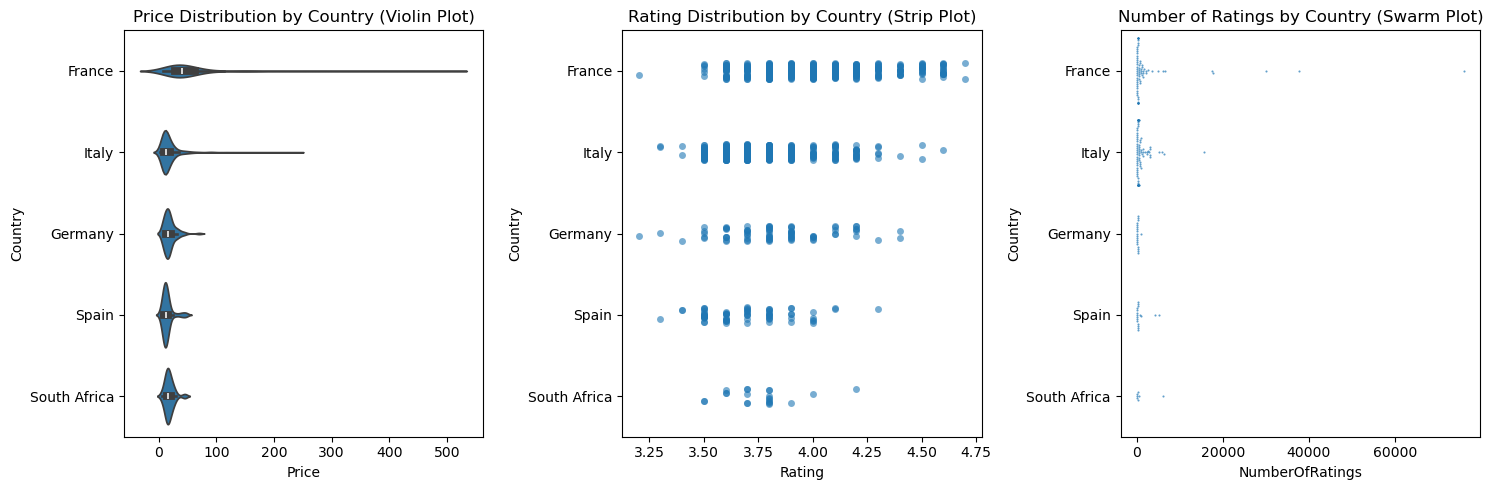

In [70]:
# 6. Advanced categorical visualization - Violin plots
plt.figure(figsize=(15, 5))

# Violin plot: Price distribution by top countries
plt.subplot(1, 3, 1)
top_5_countries = df_sparkling_cost['Country'].value_counts().head(5).index
sns.violinplot(data=df_sparkling_cost[df_sparkling_cost['Country'].isin(top_5_countries)], 
               y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Country (Violin Plot)')

# Strip plot: Rating vs Country
plt.subplot(1, 3, 2)
sns.stripplot(data=df_sparkling_cost[df_sparkling_cost['Country'].isin(top_5_countries)], 
              y='Country', x='Rating', order=top_5_countries, alpha=0.6)
plt.title('Rating Distribution by Country (Strip Plot)')

# Swarm plot: NumberOfRatings vs Country (sample data to avoid overcrowding)
plt.subplot(1, 3, 3)
sample_data = df_sparkling_cost[df_sparkling_cost['Country'].isin(top_5_countries)].sample(n=min(200, len(df_sparkling_cost)), random_state=42)
sns.swarmplot(data=sample_data, y='Country', x='NumberOfRatings', 
              order=top_5_countries, size=1.5, alpha=0.7)
plt.title('Number of Ratings by Country (Swarm Plot)')

plt.tight_layout()
plt.show()

In [69]:
# 7. Summary statistics for categorical variables
print("=== CATEGORICAL VARIABLE SUMMARY ===\n")

print("Country Distribution:")
print(df_sparkling_cost['Country'].value_counts().head(10))
print(f"Total unique countries: {df_sparkling_cost['Country'].nunique()}")

print("\nRegion Distribution:")
print(df_sparkling_cost['Region'].value_counts().head(10))
print(f"Total unique regions: {df_sparkling_cost['Region'].nunique()}")

print("\nWinery Distribution:")
print(df_sparkling_cost['Winery'].value_counts().head(10))
print(f"Total unique wineries: {df_sparkling_cost['Winery'].nunique()}")

print("\nYear Distribution:")
print(df_sparkling_cost['Year'].value_counts().sort_index().tail(10))
print(f"Year range: {df_sparkling_cost['Year'].min()} - {df_sparkling_cost['Year'].max()}")

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
categorical_cols = ['Name', 'Country', 'Region', 'Winery', 'Year']
for col in categorical_cols:
    missing = df_sparkling_cost[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(df_sparkling_cost)*100:.1f}%)")

=== CATEGORICAL VARIABLE SUMMARY ===

Country Distribution:
Country
France           398
Italy            375
Germany           78
Spain             70
South Africa      22
Austria           19
Luxembourg         9
United States      7
Portugal           7
Australia          5
Name: count, dtype: int64
Total unique countries: 16

Region Distribution:
Region
Champagne                            263
Cava                                  57
Prosecco                              56
Conegliano-Valdobbiadene Prosecco     53
Veneto                                50
Franciacorta                          47
Champagne Premier Cru                 30
Prosecco di Treviso                   27
Pfalz                                 20
Rheingau                              20
Name: count, dtype: int64
Total unique regions: 123

Winery Distribution:
Winery
Louis Roederer     18
Bellavista         16
Ferrari            14
Villa Sandi        13
Bruno Paillard     12
Raumland           12
Taittinger       

## Variance Inflation Factor (VIF) Analysis
VIF helps detect multicollinearity between numerical features. A VIF > 10 typically indicates high multicollinearity that may need to be addressed.

In [71]:
# Install required package for VIF calculation
%pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.6 MB 7.7 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.6 MB 8.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.6 MB 8.0 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 7.7 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 7.4 MB/s  0:00:01

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- -----------------

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def calculate_vif(df, numerical_cols):
    """
    Calculate VIF for numerical columns in a dataframe
    """
    # Select only numerical columns and remove any missing values
    data = df[numerical_cols].dropna()
    
    # Standardize the features (recommended for VIF calculation)
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_scaled.columns
    vif_data["VIF"] = [variance_inflation_factor(data_scaled.values, i) 
                       for i in range(len(data_scaled.columns))]
    
    return vif_data.sort_values('VIF', ascending=False)

In [76]:
# Calculate VIF for Wine Quality datasets (UCI)
print("=== VIF Analysis for Wine Quality Datasets ===\n")

# Red wine quality dataset
red_numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates', 'alcohol', 'quality']

print("Red Wine Quality Dataset VIF:")
red_vif = calculate_vif(df_red, red_numerical_cols)
print(red_vif)
print(f"\nFeatures with VIF > 10: {len(red_vif[red_vif['VIF'] > 10])}")
print(f"Features with VIF > 5: {len(red_vif[red_vif['VIF'] > 5])}")

print("\n" + "="*50 + "\n")


=== VIF Analysis for Wine Quality Datasets ===

Red Wine Quality Dataset VIF:
                 Feature       VIF
0          fixed acidity  7.772051
7                density  6.346491
8                     pH  3.339511
10               alcohol  3.238899
2            citric acid  3.131055
6   total sulfur dioxide  2.214467
5    free sulfur dioxide  1.968010
1       volatile acidity  1.879663
3         residual sugar  1.703859
11               quality  1.563848
4              chlorides  1.500591
9              sulphates  1.487286

Features with VIF > 10: 0
Features with VIF > 5: 2




In [75]:
# White wine quality dataset  
white_numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                       'pH', 'sulphates', 'alcohol', 'quality']

print("White Wine Quality Dataset VIF:")
white_vif = calculate_vif(df_white, white_numerical_cols)
print(white_vif)
print(f"\nFeatures with VIF > 10: {len(white_vif[white_vif['VIF'] > 10])}")
print(f"Features with VIF > 5: {len(white_vif[white_vif['VIF'] > 5])}")

White Wine Quality Dataset VIF:
                 Feature        VIF
7                density  28.591234
3         residual sugar  12.947302
10               alcohol   7.807600
0          fixed acidity   2.696863
6   total sulfur dioxide   2.239495
8                     pH   2.215431
5    free sulfur dioxide   1.795035
11               quality   1.392506
4              chlorides   1.236874
1       volatile acidity   1.203769
2            citric acid   1.165228
9              sulphates   1.147761

Features with VIF > 10: 2
Features with VIF > 5: 3


In [74]:
# Calculate VIF for Wine Cost datasets (Kaggle)
print("=== VIF Analysis for Wine Cost Datasets ===\n")

# Numerical columns for cost datasets
cost_numerical_cols = ['Rating', 'NumberOfRatings', 'Price']

datasets = {
    'Red Wine Cost': df_red_cost,
    'White Wine Cost': df_white_cost, 
    'Rose Wine Cost': df_rose_cost,
    'Sparkling Wine Cost': df_sparkling_cost
}

for name, dataset in datasets.items():
    print(f"{name} Dataset VIF:")
    try:
        vif_result = calculate_vif(dataset, cost_numerical_cols)
        print(vif_result)
        print(f"Features with VIF > 10: {len(vif_result[vif_result['VIF'] > 10])}")
        print(f"Features with VIF > 5: {len(vif_result[vif_result['VIF'] > 5])}")
    except Exception as e:
        print(f"Error calculating VIF: {e}")
    print("\n" + "="*40)

=== VIF Analysis for Wine Cost Datasets ===

Red Wine Cost Dataset VIF:
           Feature       VIF
0           Rating  1.263721
2            Price  1.256623
1  NumberOfRatings  1.006652
Features with VIF > 10: 0
Features with VIF > 5: 0

White Wine Cost Dataset VIF:
           Feature       VIF
2            Price  1.274574
0           Rating  1.273900
1  NumberOfRatings  1.000800
Features with VIF > 10: 0
Features with VIF > 5: 0

Rose Wine Cost Dataset VIF:
           Feature       VIF
2            Price  1.230663
0           Rating  1.229885
1  NumberOfRatings  1.000740
Features with VIF > 10: 0
Features with VIF > 5: 0

Sparkling Wine Cost Dataset VIF:
           Feature       VIF
0           Rating  1.956307
2            Price  1.922623
1  NumberOfRatings  1.026553
Features with VIF > 10: 0
Features with VIF > 5: 0



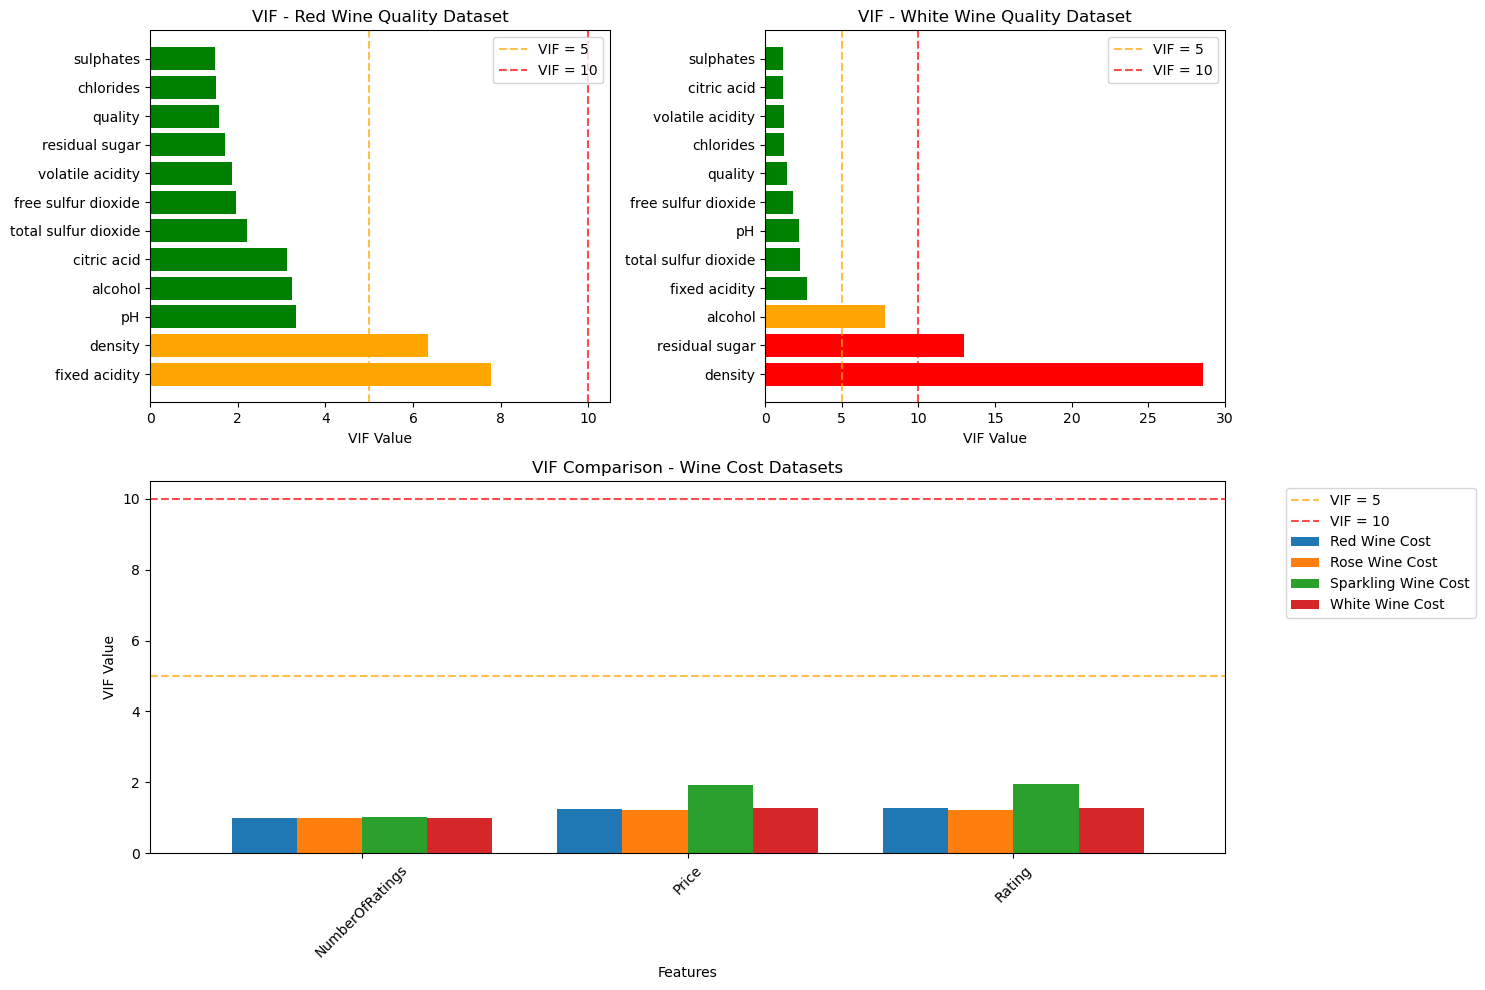

In [77]:
# Visualize VIF results
plt.figure(figsize=(15, 10))

# Plot VIF for red wine quality dataset
plt.subplot(2, 2, 1)
red_vif_plot = red_vif.copy()
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in red_vif_plot['VIF']]
plt.barh(red_vif_plot['Feature'], red_vif_plot['VIF'], color=colors)
plt.xlabel('VIF Value')
plt.title('VIF - Red Wine Quality Dataset')
plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
plt.legend()

# Plot VIF for white wine quality dataset
plt.subplot(2, 2, 2)
white_vif_plot = white_vif.copy()
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in white_vif_plot['VIF']]
plt.barh(white_vif_plot['Feature'], white_vif_plot['VIF'], color=colors)
plt.xlabel('VIF Value')
plt.title('VIF - White Wine Quality Dataset')
plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
plt.legend()

# Plot VIF comparison for cost datasets
plt.subplot(2, 1, 2)
cost_vif_comparison = pd.DataFrame()
for name, dataset in datasets.items():
    try:
        vif_result = calculate_vif(dataset, cost_numerical_cols)
        vif_result['Dataset'] = name
        cost_vif_comparison = pd.concat([cost_vif_comparison, vif_result])
    except:
        continue

if not cost_vif_comparison.empty:
    pivot_data = cost_vif_comparison.pivot(index='Feature', columns='Dataset', values='VIF')
    pivot_data.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
    plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
    plt.title('VIF Comparison - Wine Cost Datasets')
    plt.xlabel('Features')
    plt.ylabel('VIF Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

=== Correlation Analysis for High VIF Features ===

Red Wine Quality Dataset - Correlation Matrix:
White Wine Quality Dataset - Correlation Matrix:
White Wine Quality Dataset - Correlation Matrix:


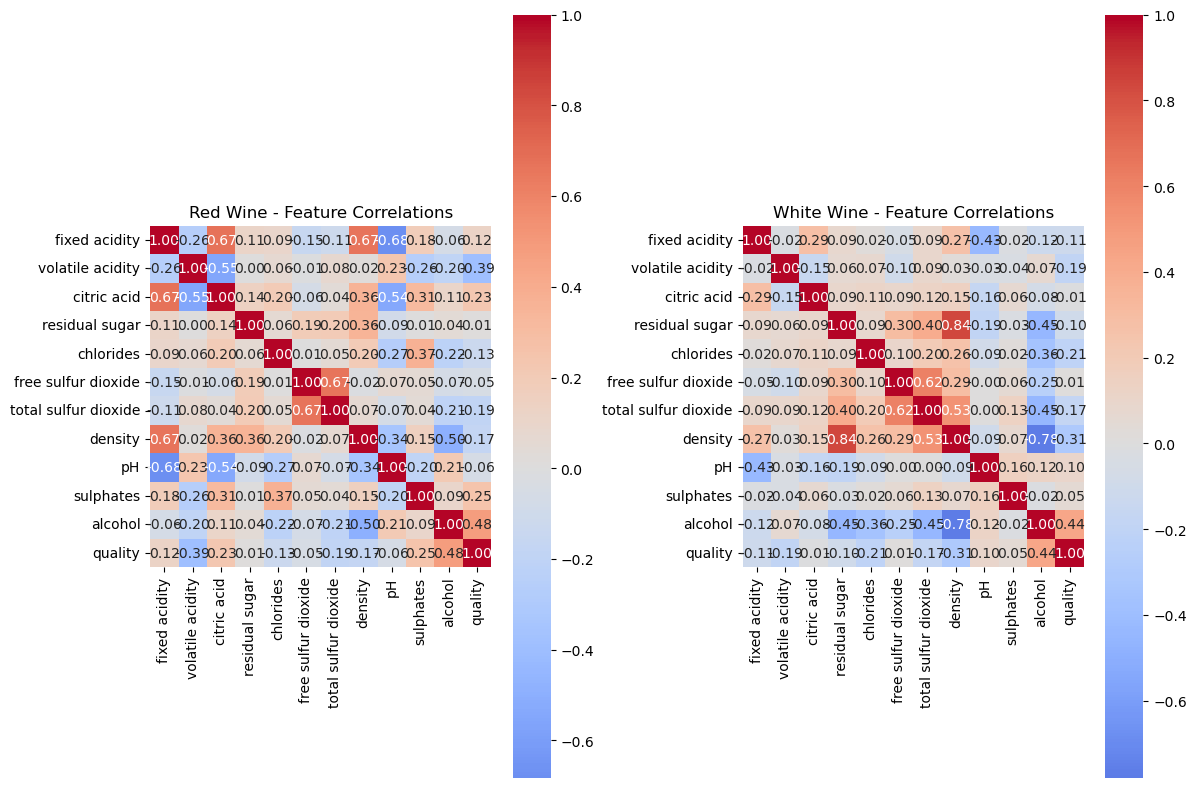


High Correlations (>0.7) in Red Wine Dataset:
No correlations > 0.7 found

High Correlations (>0.7) in White Wine Dataset:
        Feature 1 Feature 2  Correlation
0  residual sugar   density     0.838966
1         density   alcohol    -0.780138


In [78]:
# Correlation analysis to understand high VIF features
print("=== Correlation Analysis for High VIF Features ===\n")

# Red wine correlation matrix
print("Red Wine Quality Dataset - Correlation Matrix:")
red_corr = df_red[red_numerical_cols].corr()
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(red_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Red Wine - Feature Correlations')

# White wine correlation matrix
print("White Wine Quality Dataset - Correlation Matrix:")
white_corr = df_white[white_numerical_cols].corr()
plt.subplot(1, 2, 2)
sns.heatmap(white_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('White Wine - Feature Correlations')

plt.tight_layout()
plt.show()

# Find highly correlated pairs
def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    return pd.DataFrame(high_corr_pairs)

print("\nHigh Correlations (>0.7) in Red Wine Dataset:")
red_high_corr = find_high_correlations(red_corr, 0.7)
if not red_high_corr.empty:
    print(red_high_corr)
else:
    print("No correlations > 0.7 found")

print("\nHigh Correlations (>0.7) in White Wine Dataset:")
white_high_corr = find_high_correlations(white_corr, 0.7)
if not white_high_corr.empty:
    print(white_high_corr)
else:
    print("No correlations > 0.7 found")

### VIF Interpretation Guide

**VIF Values:**
- **VIF = 1**: No multicollinearity
- **1 < VIF < 5**: Moderate multicollinearity (acceptable)
- **5 ≤ VIF < 10**: High multicollinearity (concerning)
- **VIF ≥ 10**: Very high multicollinearity (problematic)

**Solutions for High VIF:**
1. **Remove highly correlated features** (one from each pair)
2. **Principal Component Analysis (PCA)** to create uncorrelated components
3. **Ridge Regression** which handles multicollinearity naturally
4. **Feature selection** using techniques like LASSO
5. **Domain knowledge** to decide which features to keep